# An implementation of a Spam Filter in Python that uses the Naive Bayes Model to classify emails as spam or ham. The program uses term frequency and inverse document frequency to classify a mail as ham or spam. 

## Let's import some libraries we will need

In [1]:
import os
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

To show Visuals in terminal

In [2]:
%matplotlib inline

Let's add a method to get emails from the folder 'emails' and add labels to it

In [3]:
def create_dataset():
    path = 'emails/'
    files = os.listdir(path)
    emails = [path + email for email in files]
    labels = []
    mail_text = []
    for email in emails:
        if "ham" in email:
            labels.append(1)
        elif "spam" in email:
            labels.append(0)
        with open(email, 'r', encoding="ascii", errors="ignore") as f:
            data = f.read()
        mail_text.append(data)
        f.close()
    print(len(labels))
    return emails, mail_text, labels

Let's add a method to process the text in mails

In [4]:
def process_words(mail):
    # Get a List of all words excluding punctuations
    words = [char for char in mail if char not in string.punctuation]
    # Join back the words
    words = ''.join(words)
    # Remove stopwords: words that are common and don't help in distinguishing
    words = [c for c in words.split() if c not in stopwords.words('english')]
    # Stremming The words (fast, faster, fastest are same as fast)
    ps = PorterStemmer()
    words = [ps.stem(w) for w in words]
    return words

Now Let's have a main method 

In [5]:
if __name__ == '__main__':
    paths, mail_text, labels = create_dataset()

5172


Create a dataFrame

In [8]:
    d = {"Path": paths, "Text": mail_text, "Label": labels}
    mails_with_labels = pd.DataFrame(d)

Add a Column 'length' to mails

In [9]:
    mails_with_labels['length'] = mails_with_labels['Text'].apply(len)

In [10]:
    mails_with_labels.head() 

,Path,Text,Label,length
0,emails/0234.2000-01-21.farmer.ham.txt,"Subject: gmt . inc .\ntom ,\nplease create a s...",1,314
1,emails/0693.2004-03-21.GP.spam.txt,"Subject: we care , no lines ! no hassle ! or e...",0,61
2,emails/4104.2005-03-19.GP.spam.txt,Subject: online pharmacy zu\nwant a cheap pers...,0,87
3,emails/4592.2001-05-22.farmer.ham.txt,"Subject: daren ,\nthe firm trading waha book h...",1,554
4,emails/5025.2001-10-31.farmer.ham.txt,Subject: re : tglo status\nsorry bout the firs...,1,2372


In [9]:
    mails_with_labels.groupby('Label').describe()

length                                                               
        count         mean          std   min    25%    50%     75%      max
Label                                                                       
0      1500.0  1203.348667  1800.211303  10.0  274.0  564.0  1240.5  21749.0
1      3672.0   959.392974  1360.494244  17.0  227.0  517.5  1208.0  31860.0

In [10]:
    mails_with_labels.head()

,Path,Text,Label,length
0,emails/0234.2000-01-21.farmer.ham.txt,"Subject: gmt . inc .\ntom ,\nplease create a s...",1,314
1,emails/0693.2004-03-21.GP.spam.txt,"Subject: we care , no lines ! no hassle ! or e...",0,61
2,emails/4104.2005-03-19.GP.spam.txt,Subject: online pharmacy zu\nwant a cheap pers...,0,87
3,emails/4592.2001-05-22.farmer.ham.txt,"Subject: daren ,\nthe firm trading waha book h...",1,554
4,emails/5025.2001-10-31.farmer.ham.txt,Subject: re : tglo status\nsorry bout the firs...,1,2372


Let's analyse and visualize our Data

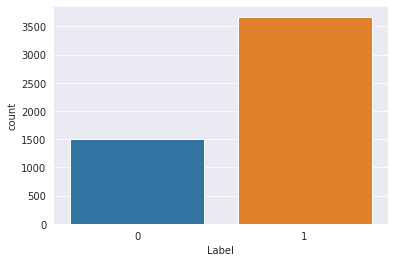

In [11]:
    sns.set_style('darkgrid')
    sns.countplot(x='Label', data=mails_with_labels)

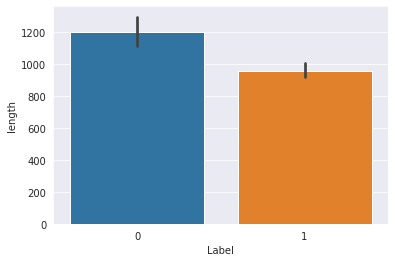

In [12]:
    bar_plt = sns.barplot(x='Label', y='length', data=mails_with_labels)

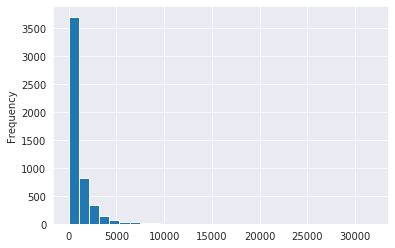

In [13]:
    mails_with_labels['length'].plot.hist(bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf00d32f10>,
      dtype=object)

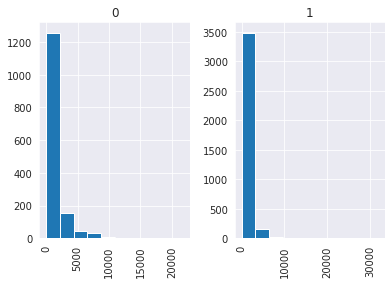

In [14]:
    mails_with_labels.hist(column='length', by='Label')

In [15]:
    bag_of_words_transformer = CountVectorizer(analyzer=process_words)
    bag_of_words_transformer.fit(mails_with_labels['Text'])

CountVectorizer(analyzer=<function process_words at 0x7fcf00d54050>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
    mails_bag_of_words = bag_of_words_transformer.transform(mails_with_labels['Text'])

In [17]:
    tfidf_transformer = TfidfTransformer().fit(mails_bag_of_words)
    mails_tfidf = tfidf_transformer.transform(mails_bag_of_words)
    X = mails_tfidf
    y = mails_with_labels['Label']

In [18]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
    modelNB = MultinomialNB()
    modelNB.fit(X_train, y_train)
    predictions = modelNB.predict(X_test)
    print(classification_report(y_test, predictions))
    print(accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79       376
           1       0.88      1.00      0.93       917

    accuracy                           0.90      1293
   macro avg       0.94      0.83      0.86      1293
weighted avg       0.91      0.90      0.89      1293

0.9002320185614849
[[248 128]
 [  1 916]]


Now let's try some other Models

In [20]:
    from sklearn.svm import SVC
    modelSV = SVC(gamma=0.001, C=100)
    modelSV.fit(X_train, y_train)
    predictions = modelSV.predict(X_test)
    print(accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

0.9791183294663574
[[374   2]
 [ 25 892]]


SVC works better

In [21]:
    from sklearn.model_selection import GridSearchCV

In [22]:
    param_grid = {'C' : [.1, 1, 10, 1000, 1000], 'gamma' : [1, .1, .01, .001, .0001]}

In [23]:
    grid = GridSearchCV(SVC(), param_grid)

In [24]:
    grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 1000, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
    optimal_C = grid.best_params_['C']
    optimal_gamma = grid.best_params_['gamma']
    optimal_modelSV = SVC(gamma=optimal_gamma, C=optimal_C)
    optimal_modelSV.fit(X_train, y_train)
    predictions = optimal_modelSV.predict(X_test)
    print(accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

0.9860788863109049
[[372   4]
 [ 14 903]]


In [26]:
    from sklearn.cluster import KMeans

In [27]:
    k_means = KMeans(n_clusters=2)

In [28]:
    k_means.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
    pred = k_means.predict(X_test)

In [32]:
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))

0.588553750966744
[[  0 376]
 [156 761]]
